# <a name="0">Analytics vidhya - Jobathon - June 2022</a>

In this notebook, we are performing initial data investigations to discover patterns, spot anomalies, and look for insights to inform later ML modeling choices.

1. <a href="#1">Read the dataset</a>
2. <a href="#2">Glimpse of dataset</a>
3. <a href="#3">Univariate analysis</a>
4. <a href="#4">Bivariate analysis</a>
5. <a href="#5">Machine Learning</a>

## 1. <a name="1">Read the dataset</a>
(<a href="#0">Go to top</a>)

Let's read the dataset into a dataframe, using Pandas.

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Setting pandas options for good visualization
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 100)
pd.set_option('display.precision', 4)
pd.set_option('display.float_format',  '{:,.2f}'.format)
pd.set_option('display.max_info_columns', 30)

# seaborn style for chart visualization
sns.set_style("whitegrid")

In [3]:
# reading data
training_data = pd.read_csv("../data/train_wn75k28.csv")
test_data = pd.read_csv("../data/test_Wf7sxXF.csv")

In [4]:
# data preprocessing
# changing var type
training_data['created_at'] = pd.to_datetime(training_data["created_at"])
test_data['created_at'] = pd.to_datetime(test_data["created_at"])

In [5]:
# Feature engineering - train
# Creating date time features
season = {
    2:"Summer",3:"Summer",4:"Summer",5:"Summer",
    6:"Monsoon",7:"Monsoon",8:"Monsoon",9:"Monsoon",
    10:"Winter",11:"Winter",12:"Winter",1:"Winter"
}

training_data["Year"]=  training_data["created_at"].dt.year
training_data["Month"]=  training_data["created_at"].dt.month
training_data["Day"]=  training_data["created_at"].dt.day
training_data["Season"]=  training_data["Month"].map(season)
training_data["Week_of_year"] =  training_data["created_at"].dt.week
training_data["Day_of_week"] =  training_data["created_at"].dt.dayofweek
training_data["Weekend"] = np.where(training_data["Day_of_week"].isin([5,6]), 1, 0)
training_data["Month_Start"] =  training_data["created_at"].dt.is_month_start.astype(int)
training_data["Month_End"] =  training_data["created_at"].dt.is_month_end.astype(int)
training_data["Quarter_Start"] =  training_data["created_at"].dt.is_quarter_start.astype(int)
training_data["Quarter_End"] =  training_data["created_at"].dt.is_quarter_end.astype(int)
training_data["Year_Start"] =  training_data["created_at"].dt.is_year_start.astype(int)
training_data["Year_End"] =  training_data["created_at"].dt.is_year_end.astype(int)

# one hot encoding for day of week
training_data = \
pd.concat([training_data.drop(["Day_of_week"], axis = 1), 
           pd.get_dummies(training_data["Day_of_week"], prefix = "Day_of_week")], axis = 1)

# one hot encoding for Season
training_data = \
pd.concat([training_data.drop(["Season"], axis = 1), 
           pd.get_dummies(training_data["Season"], prefix = "Season")], axis = 1)

/tmp/ipykernel_18405/2779141221.py:13: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  training_data["Week_of_year"] =  training_data["created_at"].dt.week


In [6]:
# Feature engineering - test
# Creating date time features
test_data["Year"]=  test_data["created_at"].dt.year
test_data["Month"]=  test_data["created_at"].dt.month
test_data["Day"]=  test_data["created_at"].dt.day
test_data["Season"]=  test_data["Month"].map(season)
test_data["Week_of_year"] =  test_data["created_at"].dt.week
test_data["Day_of_week"] =  test_data["created_at"].dt.dayofweek
test_data["Weekend"] = np.where(test_data["Day_of_week"].isin([5,6]), 1, 0)
test_data["Month_Start"] =  test_data["created_at"].dt.is_month_start.astype(int)
test_data["Month_End"] =  test_data["created_at"].dt.is_month_end.astype(int)
test_data["Quarter_Start"] =  test_data["created_at"].dt.is_quarter_start.astype(int)
test_data["Quarter_End"] =  test_data["created_at"].dt.is_quarter_end.astype(int)
test_data["Year_Start"] =  test_data["created_at"].dt.is_year_start.astype(int)
test_data["Year_End"] =  test_data["created_at"].dt.is_year_end.astype(int)

# one hot encoding for day of week
test_data = \
pd.concat([test_data.drop(["Day_of_week"], axis = 1), 
           pd.get_dummies(test_data["Day_of_week"], prefix = "Day_of_week")], axis = 1)

# one hot encoding for Season
test_data = \
pd.concat([test_data.drop(["Season"], axis = 1), 
           pd.get_dummies(test_data["Season"], prefix = "Season")], axis = 1)

/tmp/ipykernel_18405/1888689346.py:7: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  test_data["Week_of_year"] =  test_data["created_at"].dt.week


## 2. <a name="2">Glimpse of dataset</a>
(<a href="#0">Go to top</a>)

We will look at number of rows, columns and some simple statistics of the dataset.

### Top 5 rows

In [7]:
# top 5 rows - train
training_data.head()

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy,Year,Month,Day,Week_of_year,Weekend,Month_Start,Month_End,Quarter_Start,Quarter_End,Year_Start,Year_End,Day_of_week_0,Day_of_week_1,Day_of_week_2,Day_of_week_3,Day_of_week_4,Day_of_week_5,Day_of_week_6,Season_Monsoon,Season_Summer,Season_Winter
0,1,2021-01-01,1,2,2.00,2020-09-24,0,0,0,0,0,0,1,1,0,0,0,0,0,2021,1,1,53,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1
1,2,2021-01-01,2,1,2.00,2020-09-19,1,0,1,0,0,0,1,0,0,0,0,0,0,2021,1,1,53,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1
2,3,2021-01-01,9,3,3.00,2021-08-11,1,0,0,0,0,0,0,0,0,0,0,0,0,2021,1,1,53,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1
3,4,2021-01-01,6,7,2.00,2017-10-04,0,0,0,0,0,0,0,0,0,0,0,0,0,2021,1,1,53,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1
4,5,2021-01-01,4,6,NaN,2020-06-08,0,0,0,0,0,0,1,0,0,0,1,0,0,2021,1,1,53,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1


### Number of rows and columns

In [8]:
# shape of data
print("Shape of training data :", training_data.shape)
print("Shape of test data :", test_data.shape)

Shape of training data : (39161, 40)
Shape of test data : (13184, 38)


### Column Names

In [9]:
# columns names
print(training_data.columns)

Index(['id', 'created_at', 'campaign_var_1', 'campaign_var_2',
       'products_purchased', 'signup_date', 'user_activity_var_1',
       'user_activity_var_2', 'user_activity_var_3', 'user_activity_var_4',
       'user_activity_var_5', 'user_activity_var_6', 'user_activity_var_7',
       'user_activity_var_8', 'user_activity_var_9', 'user_activity_var_10',
       'user_activity_var_11', 'user_activity_var_12', 'buy', 'Year', 'Month',
       'Day', 'Week_of_year', 'Weekend', 'Month_Start', 'Month_End',
       'Quarter_Start', 'Quarter_End', 'Year_Start', 'Year_End',
       'Day_of_week_0', 'Day_of_week_1', 'Day_of_week_2', 'Day_of_week_3',
       'Day_of_week_4', 'Day_of_week_5', 'Day_of_week_6', 'Season_Monsoon',
       'Season_Summer', 'Season_Winter'],
      dtype='object')


In [10]:
# columns names
print(test_data.columns)

Index(['id', 'created_at', 'campaign_var_1', 'campaign_var_2',
       'products_purchased', 'signup_date', 'user_activity_var_1',
       'user_activity_var_2', 'user_activity_var_3', 'user_activity_var_4',
       'user_activity_var_5', 'user_activity_var_6', 'user_activity_var_7',
       'user_activity_var_8', 'user_activity_var_9', 'user_activity_var_10',
       'user_activity_var_11', 'user_activity_var_12', 'Year', 'Month', 'Day',
       'Week_of_year', 'Weekend', 'Month_Start', 'Month_End', 'Quarter_Start',
       'Quarter_End', 'Year_Start', 'Year_End', 'Day_of_week_0',
       'Day_of_week_1', 'Day_of_week_2', 'Day_of_week_3', 'Day_of_week_4',
       'Day_of_week_5', 'Day_of_week_6', 'Season_Summer', 'Season_Winter'],
      dtype='object')


### Column types

In [11]:
# data types
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39161 entries, 0 to 39160
Columns: 40 entries, id to Season_Winter
dtypes: datetime64[ns](1), float64(1), int64(27), object(1), uint8(10)
memory usage: 9.3+ MB


### Unique values

In [12]:
# unique values
training_data.nunique()

id                      39161
created_at                365
campaign_var_1             16
campaign_var_2             15
products_purchased          4
signup_date              1800
user_activity_var_1         4
user_activity_var_2         2
user_activity_var_3         2
user_activity_var_4         2
user_activity_var_5         3
user_activity_var_6         4
user_activity_var_7         3
user_activity_var_8         3
user_activity_var_9         2
user_activity_var_10        2
user_activity_var_11        5
user_activity_var_12        2
buy                         2
Year                        1
Month                      12
Day                        31
Week_of_year               53
Weekend                     2
Month_Start                 2
Month_End                   2
Quarter_Start               2
Quarter_End                 2
Year_Start                  2
Year_End                    2
Day_of_week_0               2
Day_of_week_1               2
Day_of_week_2               2
Day_of_wee

### Missing % summary

In [13]:
# missing values
training_data.isnull().sum()/len(training_data)

id                     0.00
created_at             0.00
campaign_var_1         0.00
campaign_var_2         0.00
products_purchased     0.53
signup_date            0.39
user_activity_var_1    0.00
user_activity_var_2    0.00
user_activity_var_3    0.00
user_activity_var_4    0.00
user_activity_var_5    0.00
user_activity_var_6    0.00
user_activity_var_7    0.00
user_activity_var_8    0.00
user_activity_var_9    0.00
user_activity_var_10   0.00
user_activity_var_11   0.00
user_activity_var_12   0.00
buy                    0.00
Year                   0.00
Month                  0.00
Day                    0.00
Week_of_year           0.00
Weekend                0.00
Month_Start            0.00
Month_End              0.00
Quarter_Start          0.00
Quarter_End            0.00
Year_Start             0.00
Year_End               0.00
Day_of_week_0          0.00
Day_of_week_1          0.00
Day_of_week_2          0.00
Day_of_week_3          0.00
Day_of_week_4          0.00
Day_of_week_5       

## 3. <a name="3">Univariate analysis</a>
(<a href="#0">Go to top</a>)

Let's explore each column independently. At first, we will explore target variable.

### Buy

In [14]:
# freq analysis - count
print(training_data['buy'].value_counts())

# freq analysis - %
print(training_data['buy'].value_counts(normalize = True))

0    37163
1     1998
Name: buy, dtype: int64
0   0.95
1   0.05
Name: buy, dtype: float64


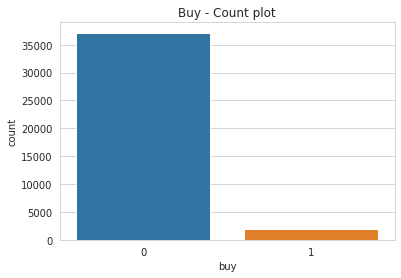

In [15]:
# count plot
plt.title("Buy - Count plot")
sns.countplot(x = 'buy', data = training_data);

> Buy is having unbalanced distributed with 0 = 95% and 1 = 5% distribution. It seems like most people don't buy at all.

### Categorical features

In [16]:
training_data.columns

Index(['id', 'created_at', 'campaign_var_1', 'campaign_var_2',
       'products_purchased', 'signup_date', 'user_activity_var_1',
       'user_activity_var_2', 'user_activity_var_3', 'user_activity_var_4',
       'user_activity_var_5', 'user_activity_var_6', 'user_activity_var_7',
       'user_activity_var_8', 'user_activity_var_9', 'user_activity_var_10',
       'user_activity_var_11', 'user_activity_var_12', 'buy', 'Year', 'Month',
       'Day', 'Week_of_year', 'Weekend', 'Month_Start', 'Month_End',
       'Quarter_Start', 'Quarter_End', 'Year_Start', 'Year_End',
       'Day_of_week_0', 'Day_of_week_1', 'Day_of_week_2', 'Day_of_week_3',
       'Day_of_week_4', 'Day_of_week_5', 'Day_of_week_6', 'Season_Monsoon',
       'Season_Summer', 'Season_Winter'],
      dtype='object')

In [17]:
# categorical columns
cat_cols = ['campaign_var_1', 'campaign_var_2',
       'user_activity_var_1',
       'user_activity_var_2', 'user_activity_var_3', 'user_activity_var_4',
       'user_activity_var_5', 'user_activity_var_6', 'user_activity_var_7',
       'user_activity_var_8', 'user_activity_var_9', 'user_activity_var_10',
       'user_activity_var_11', 'user_activity_var_12', 'Month',
       'Day', 'Week_of_year', 'Weekend', 'Month_Start', 'Month_End',
       'Quarter_Start', 'Quarter_End', 'Year_Start', 'Year_End',
       'Day_of_week_0', 'Day_of_week_1', 'Day_of_week_2', 'Day_of_week_3',
       'Day_of_week_4', 'Day_of_week_5', 'Day_of_week_6', 'Season_Monsoon',
       'Season_Summer', 'Season_Winter']

In [18]:
# freq analysis
for col in cat_cols:
    print("Freq analysis : " + col)
    print(pd.concat([
        training_data[col].value_counts(normalize = False),
        training_data[col].value_counts(normalize = True)], axis = 1))
    print("")

Freq analysis : campaign_var_1
    campaign_var_1  campaign_var_1
6             4061            0.10
5             4060            0.10
4             4018            0.10
3             3784            0.10
7             3756            0.10
2             3486            0.09
8             3407            0.09
9             2866            0.07
10            2392            0.06
11            1873            0.05
1             1593            0.04
12            1455            0.04
13            1059            0.03
14             714            0.02
15             456            0.01
16             181            0.00

Freq analysis : campaign_var_2
    campaign_var_2  campaign_var_2
6             5744            0.15
7             5472            0.14
5             5250            0.13
8             4690            0.12
4             4213            0.11
9             3537            0.09
3             2883            0.07
10            2298            0.06
2             1788         

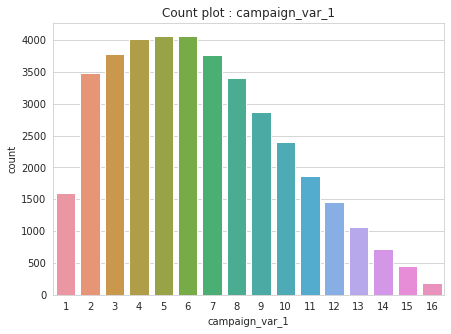

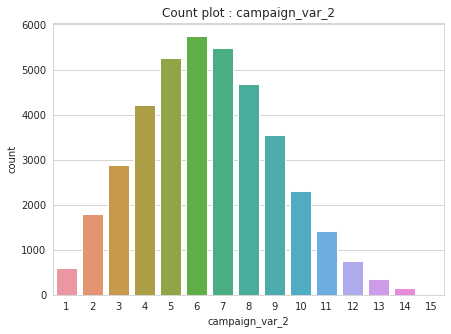

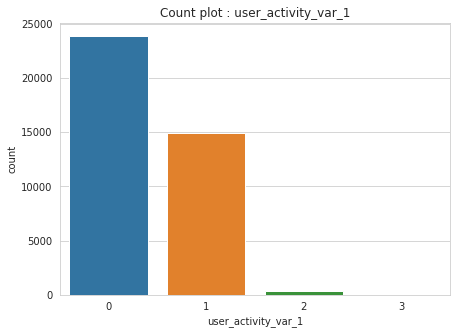

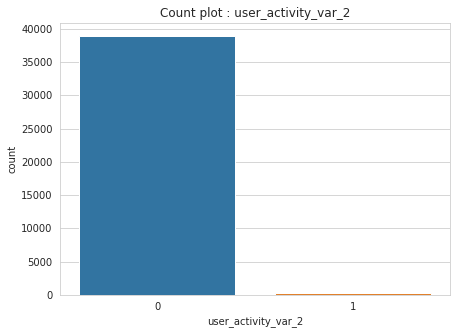

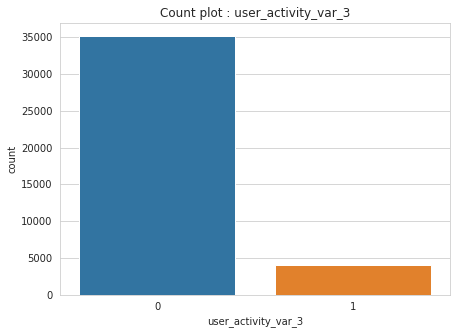

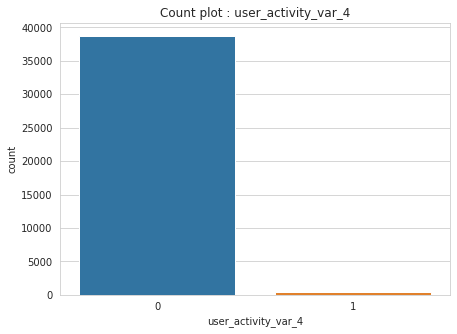

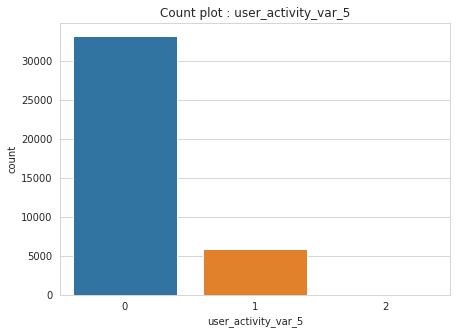

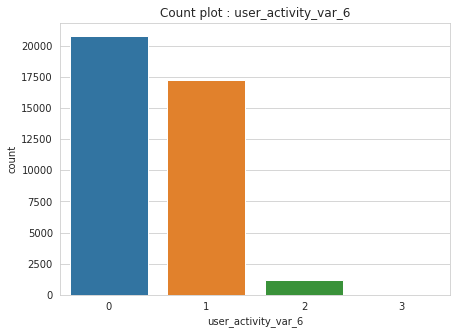

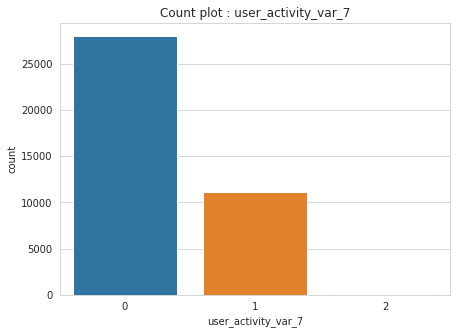

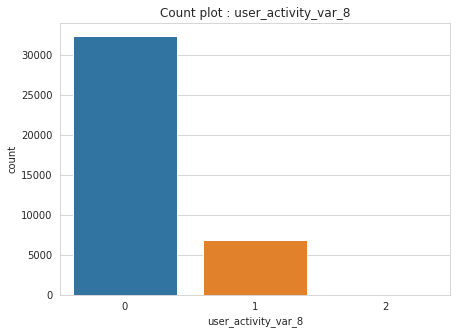

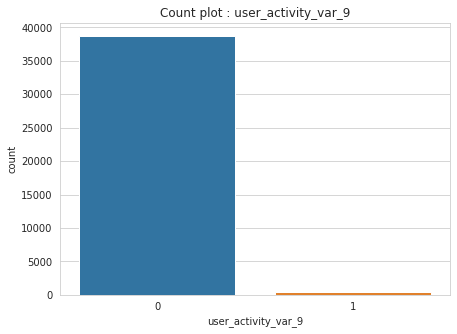

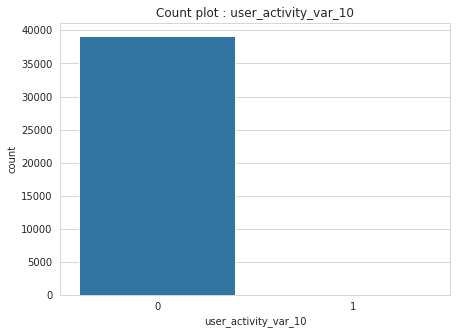

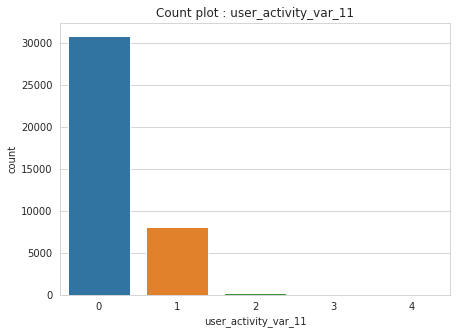

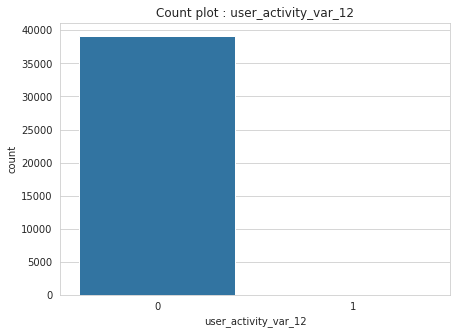

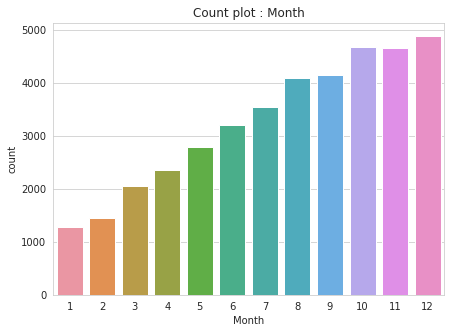

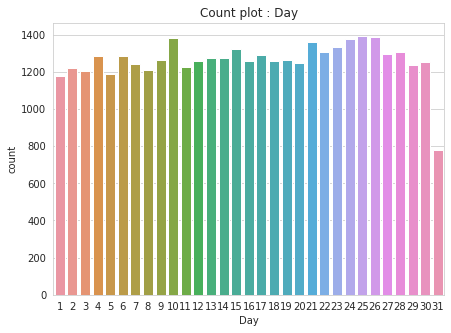

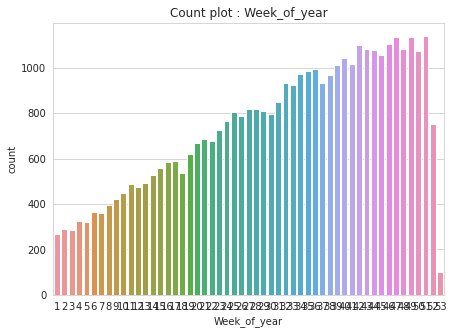

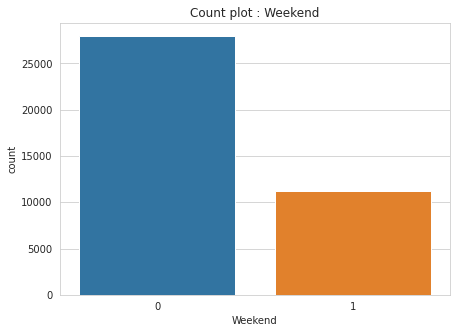

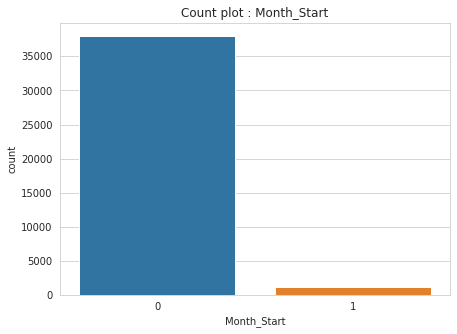

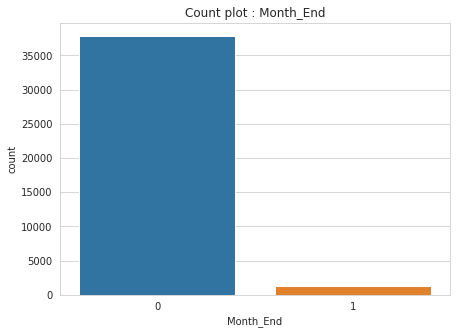

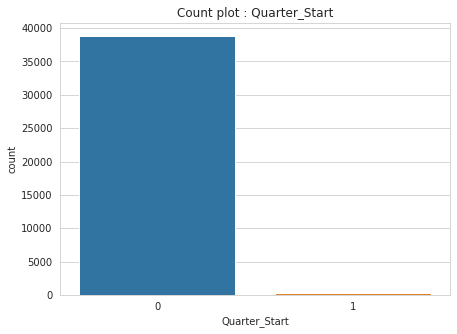

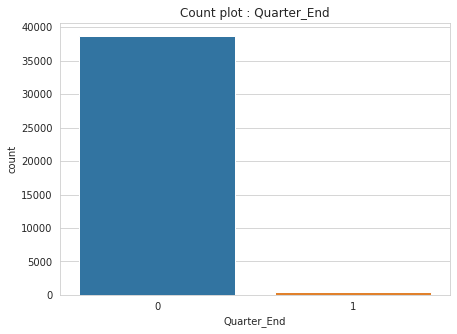

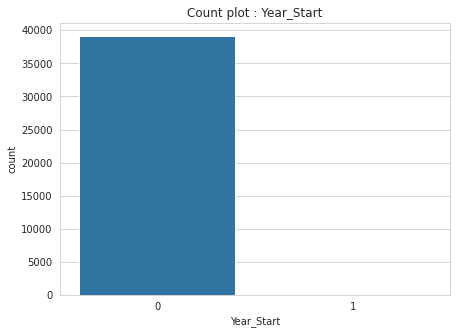

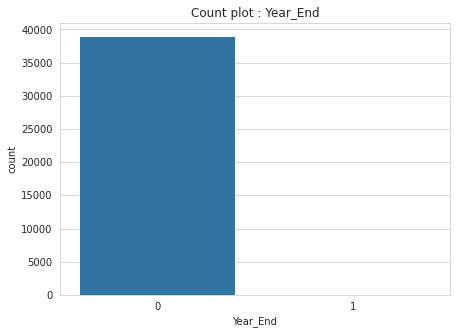

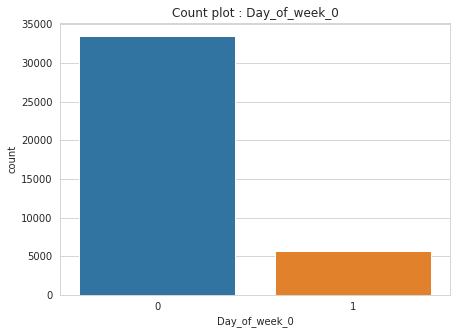

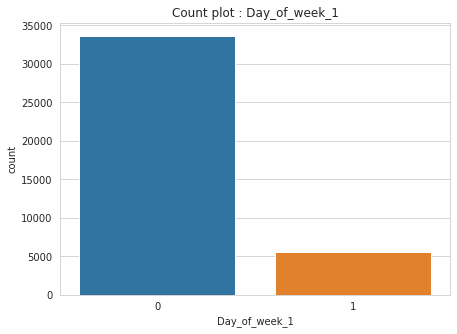

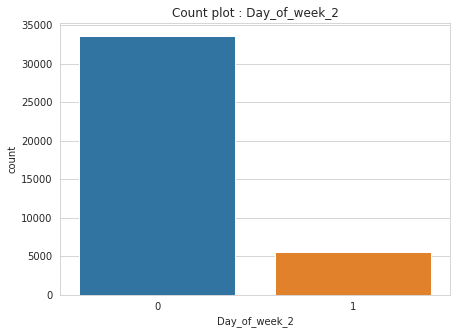

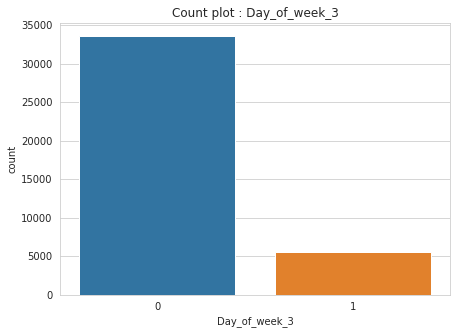

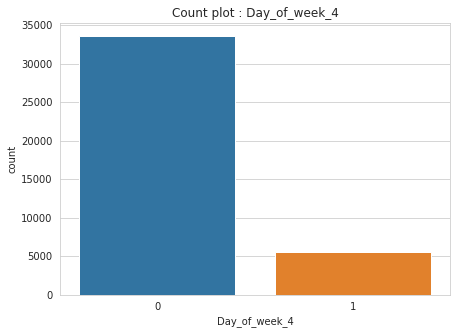

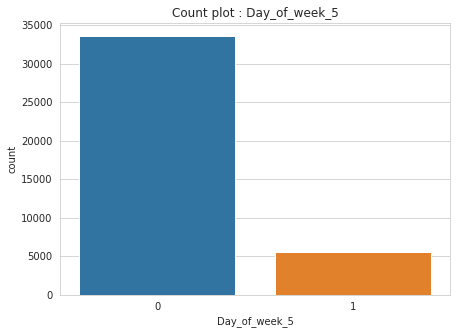

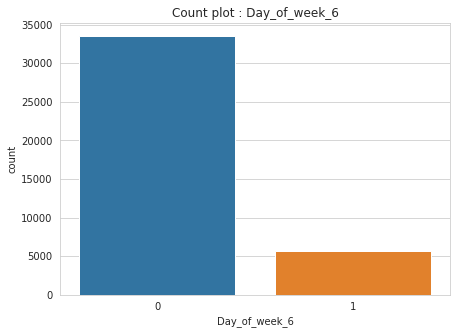

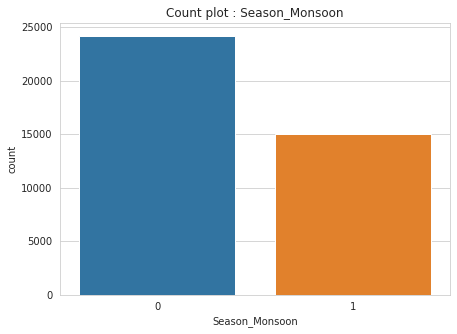

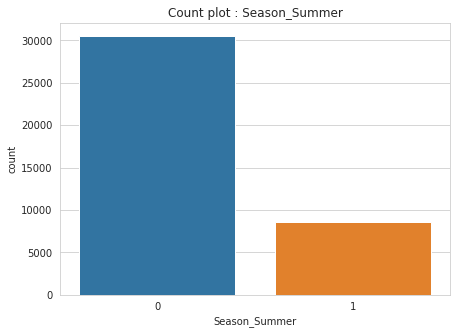

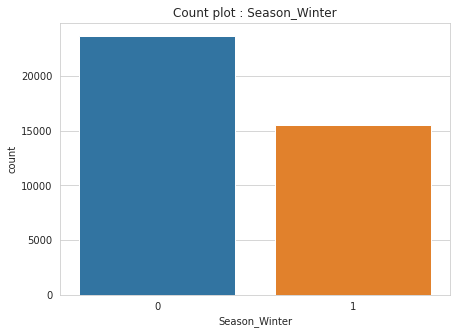

In [19]:
# count plot
for col in cat_cols:
    plt.figure(figsize = (7,5))
    plt.title("Count plot : " + col)
    sns.countplot(x = col, data = training_data)
    plt.show()

## 4. <a name="4">Bivariate analysis</a>
(<a href="#0">Go to top</a>)

Let's explore relationship of each column with target column.

/tmp/ipykernel_18405/2733158060.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize = (7,5))


<Figure size 504x360 with 0 Axes>

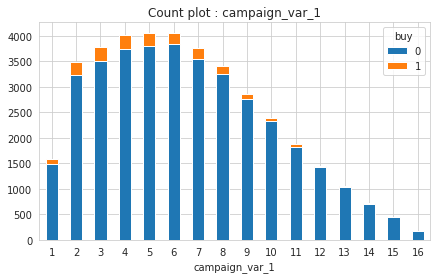

<Figure size 504x360 with 0 Axes>

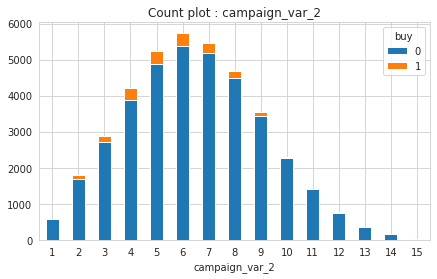

<Figure size 504x360 with 0 Axes>

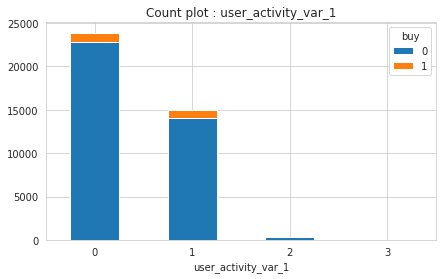

<Figure size 504x360 with 0 Axes>

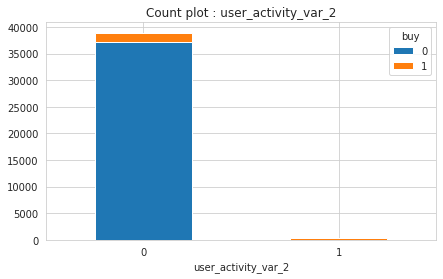

<Figure size 504x360 with 0 Axes>

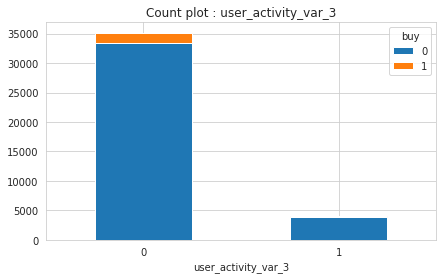

<Figure size 504x360 with 0 Axes>

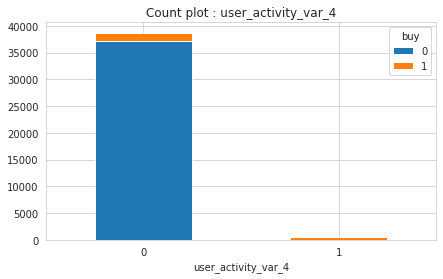

<Figure size 504x360 with 0 Axes>

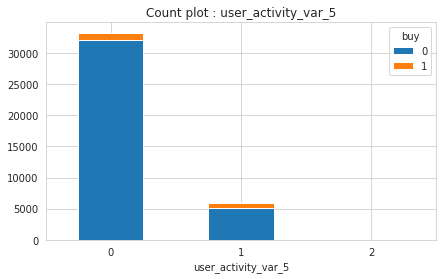

<Figure size 504x360 with 0 Axes>

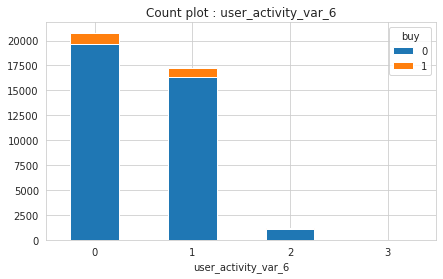

<Figure size 504x360 with 0 Axes>

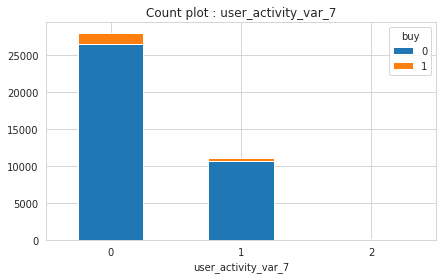

<Figure size 504x360 with 0 Axes>

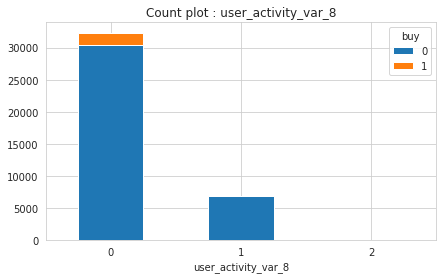

<Figure size 504x360 with 0 Axes>

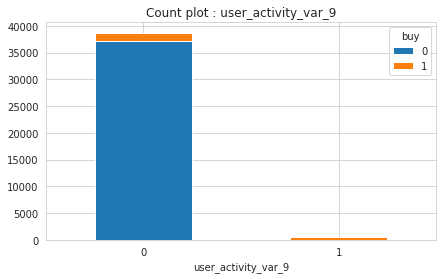

<Figure size 504x360 with 0 Axes>

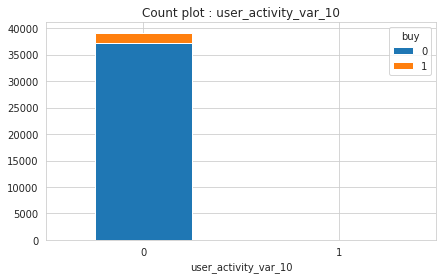

<Figure size 504x360 with 0 Axes>

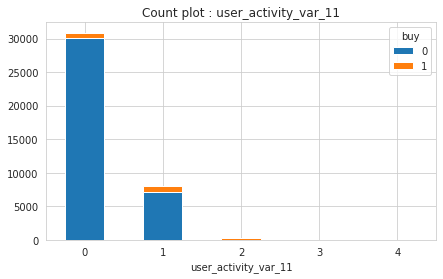

<Figure size 504x360 with 0 Axes>

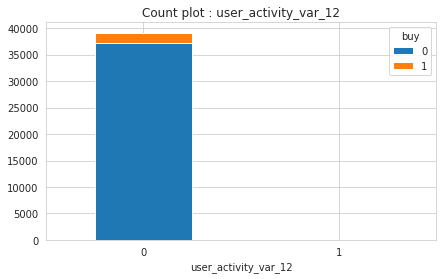

<Figure size 504x360 with 0 Axes>

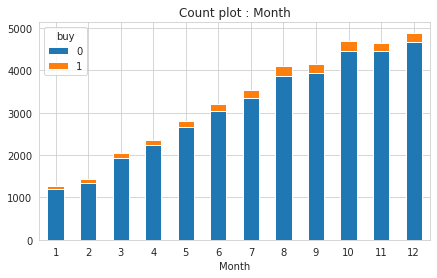

<Figure size 504x360 with 0 Axes>

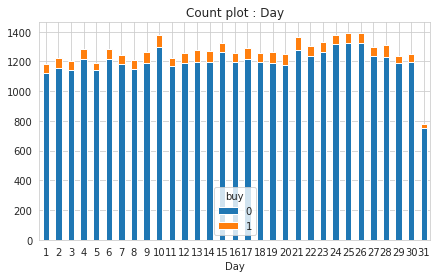

<Figure size 504x360 with 0 Axes>

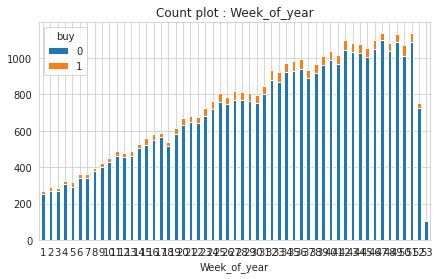

<Figure size 504x360 with 0 Axes>

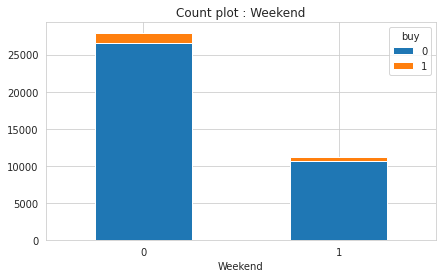

<Figure size 504x360 with 0 Axes>

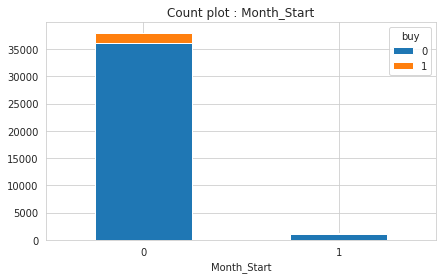

<Figure size 504x360 with 0 Axes>

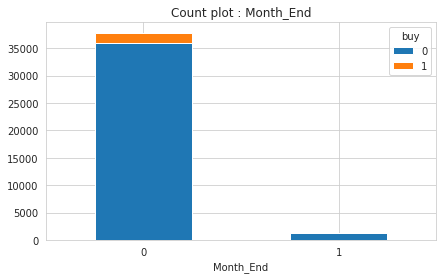

<Figure size 504x360 with 0 Axes>

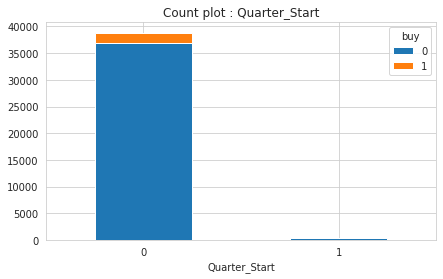

<Figure size 504x360 with 0 Axes>

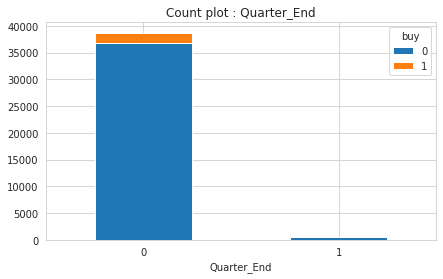

<Figure size 504x360 with 0 Axes>

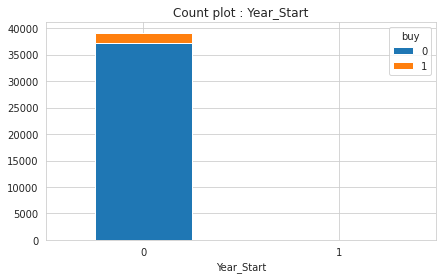

<Figure size 504x360 with 0 Axes>

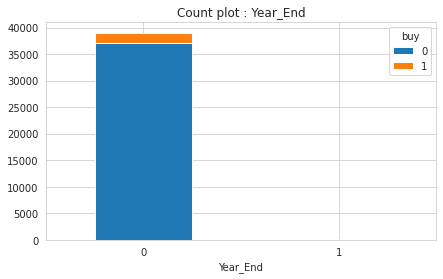

<Figure size 504x360 with 0 Axes>

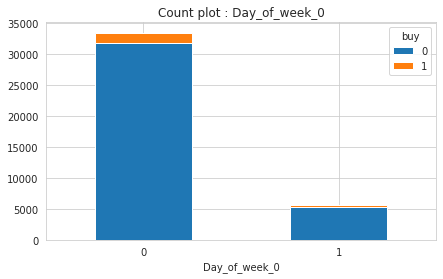

<Figure size 504x360 with 0 Axes>

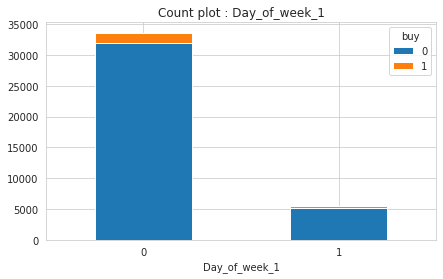

<Figure size 504x360 with 0 Axes>

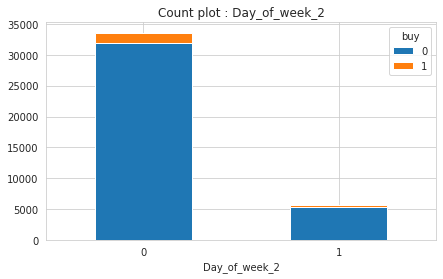

<Figure size 504x360 with 0 Axes>

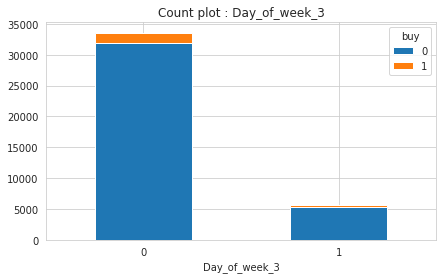

<Figure size 504x360 with 0 Axes>

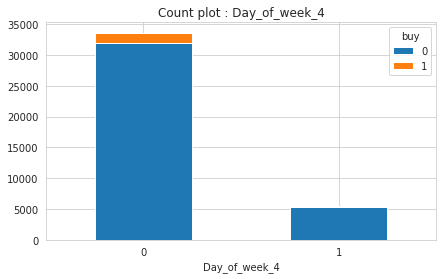

<Figure size 504x360 with 0 Axes>

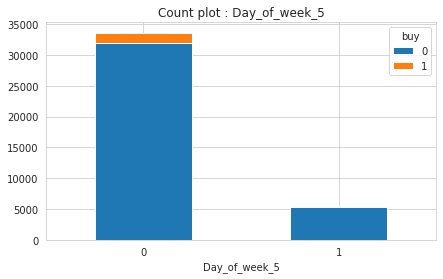

<Figure size 504x360 with 0 Axes>

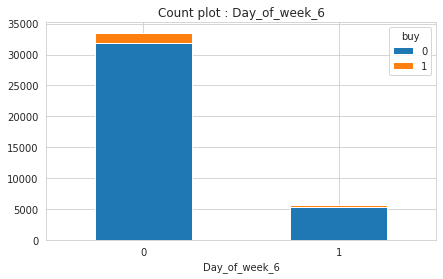

<Figure size 504x360 with 0 Axes>

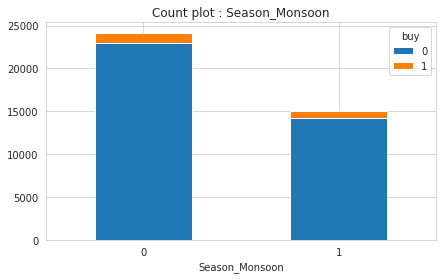

<Figure size 504x360 with 0 Axes>

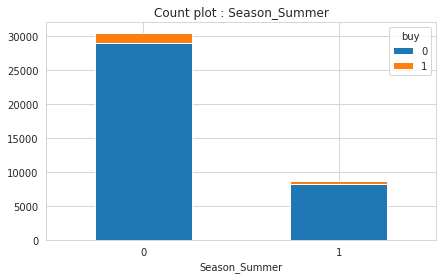

<Figure size 504x360 with 0 Axes>

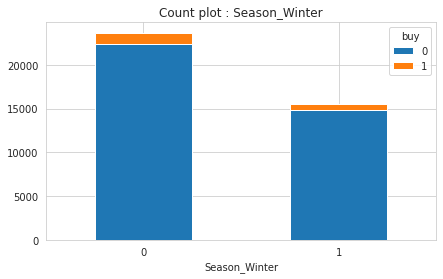

In [20]:
# bi-variate relationship between target and categorical variable
for col in cat_cols:
    plt.figure(figsize = (7,5))
    CrosstabResult=pd.crosstab(index=training_data[col],columns=training_data['buy'])
    CrosstabResult.plot.bar(figsize=(7,4), rot=0, stacked = True, title = "Count plot : " + col);

In [21]:
# checking significance of each feature with target col
X = training_data[cat_cols].values
y = training_data['buy'].values

from sklearn.feature_selection import chi2

chi2, pvalue = chi2(X,y)

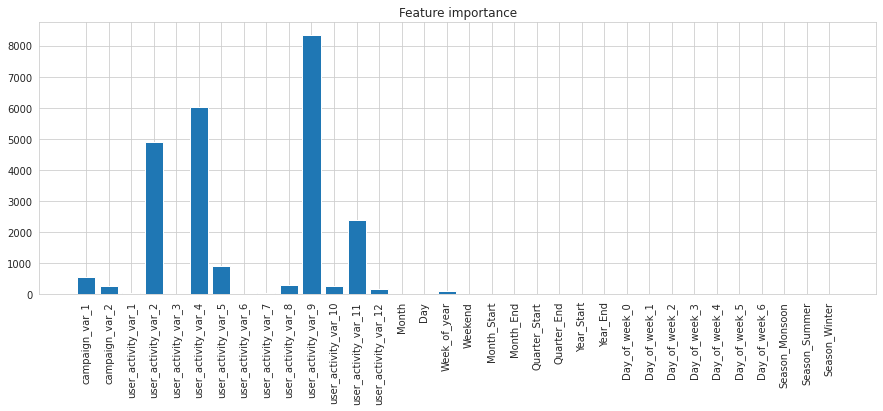

In [22]:
plt.figure(figsize = (15,5))
plt.title("Feature importance")
plt.bar(cat_cols, chi2);
plt.xticks(rotation = 90)
plt.show();

In [23]:
# feature importance summary
feature_imp = pd.DataFrame()
feature_imp["Columns"] = cat_cols
feature_imp["chi2"] = chi2
feature_imp["pvalue"] = pvalue
feature_imp["Sig"] = np.where(feature_imp["pvalue"] < 0.05, "Sig", "Not Sig")
feature_imp.sort_values(by = ["chi2"], ascending = False)

,Columns,chi2,pvalue,Sig
10,user_activity_var_9,"8,332.84",0.00,Sig
5,user_activity_var_4,"6,031.05",0.00,Sig
3,user_activity_var_2,"4,891.83",0.00,Sig
12,user_activity_var_11,"2,392.32",0.00,Sig
6,user_activity_var_5,910.07,0.00,Sig
0,campaign_var_1,550.54,0.00,Sig
9,user_activity_var_8,306.75,0.00,Sig
11,user_activity_var_10,279.00,0.00,Sig
1,campaign_var_2,265.87,0.00,Sig
13,user_activity_var_12,180.80,0.00,Sig


In [24]:
# filtering only significant columns
feature_imp[feature_imp['Sig']=='Not Sig']['Columns'].values

array(['user_activity_var_3', 'user_activity_var_6', 'Weekend',
       'Month_Start', 'Month_End', 'Quarter_Start', 'Quarter_End',
       'Year_Start', 'Year_End', 'Day_of_week_0', 'Day_of_week_1',
       'Day_of_week_2', 'Day_of_week_3', 'Day_of_week_4', 'Day_of_week_5',
       'Day_of_week_6', 'Season_Summer'], dtype=object)

## 5. <a name="5">Machine Learning</a>
(<a href="#0">Go to top</a>)

Let's start exploring some machine learning models which will be best suited for this data.

### Creating final training data

In [25]:
# dropping some columns
drop_cols = ['id', 'created_at', 'products_purchased', 'signup_date',
            'Year', 'Season_Monsoon', 'user_activity_var_3', 'user_activity_var_6', 'Weekend',
             'Month_Start', 'Month_End', 'Quarter_Start', 'Quarter_End',
             'Year_Start', 'Year_End', 'Day_of_week_0', 'Day_of_week_1',
             'Day_of_week_2', 'Day_of_week_3', 'Day_of_week_4', 'Day_of_week_5',
             'Day_of_week_6', 'Season_Summer','Season_Winter']

training_data_v2 = training_data.drop(drop_cols, axis = 1)

In [26]:
training_data_v2.head()

,campaign_var_1,campaign_var_2,user_activity_var_1,user_activity_var_2,user_activity_var_4,user_activity_var_5,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy,Month,Day,Week_of_year
0,1,2,0,0,0,0,1,1,0,0,0,0,0,1,1,53
1,2,1,1,0,0,0,1,0,0,0,0,0,0,1,1,53
2,9,3,1,0,0,0,0,0,0,0,0,0,0,1,1,53
3,6,7,0,0,0,0,0,0,0,0,0,0,0,1,1,53
4,4,6,0,0,0,0,1,0,0,0,1,0,0,1,1,53


In [27]:
training_data_v2.shape

(39161, 16)

### Finding best model using automl

In [28]:
# auto ml
from autogluon.tabular import TabularPredictor

save_path = '../models/agModels-predictClass-itr6'  # specifies folder to store trained models
metric = 'f1'
target = 'buy'
predictor = TabularPredictor(label=target, eval_metric=metric, path=save_path).fit(training_data_v2)

/home/studio-lab-user/.conda/envs/av-jobathon-june-2022/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Beginning AutoGluon training ...
AutoGluon will save models to "../models/agModels-predictClass-itr6/"
AutoGluon Version:  0.4.2
Python Version:     3.9.13
Operating System:   Linux
Train Data Rows:    39161
Train Data Columns: 15
Label Column: buy
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [0, 1]
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feature Generators to preprocess the 

In [29]:
results = predictor.fit_summary(show_plot=True)

*** Summary of fit() ***
Estimated performance of each model:
                  model  score_val  pred_time_val  fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0        NeuralNetTorch       0.67           0.03     33.92                    0.03              33.92            1       True         12
1   WeightedEnsemble_L2       0.67           0.03     36.34                    0.01               2.42            2       True         14
2              LightGBM       0.67           0.01      0.92                    0.01               0.92            1       True          4
3            LightGBMXT       0.67           0.02      1.64                    0.02               1.64            1       True          3
4       NeuralNetFastAI       0.67           0.04     29.25                    0.04              29.25            1       True         10
5               XGBoost       0.66           0.01      0.79                    0.01               0.79        

/home/studio-lab-user/.conda/envs/av-jobathon-june-2022/lib/python3.9/site-packages/autogluon/core/utils/plots.py:138: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


In [30]:
print("AutoGluon infers problem type is: ", predictor.problem_type)
print("AutoGluon identified the following types of features:")
print(predictor.feature_metadata)

AutoGluon infers problem type is:  binary
AutoGluon identified the following types of features:
('int', [])       : 10 | ['campaign_var_1', 'campaign_var_2', 'user_activity_var_1', 'user_activity_var_5', 'user_activity_var_7', ...]
('int', ['bool']) :  5 | ['user_activity_var_2', 'user_activity_var_4', 'user_activity_var_9', 'user_activity_var_10', 'user_activity_var_12']


### Feature importance

In [31]:
# feature importance
feature_imp = predictor.feature_importance(training_data_v2)

Computing feature importance via permutation shuffling for 15 features using 5000 rows with 5 shuffle sets...
	8.14s	= Expected runtime (1.63s per shuffle set)
	5.47s	= Actual runtime (Completed 5 of 5 shuffle sets)


In [32]:
feature_imp

,importance,stddev,p_value,n,p99_high,p99_low
user_activity_var_9,0.18,0.02,0.00,5,0.23,0.14
user_activity_var_11,0.12,0.02,0.00,5,0.16,0.08
user_activity_var_4,0.12,0.03,0.00,5,0.17,0.07
user_activity_var_2,0.11,0.03,0.00,5,0.16,0.06
campaign_var_2,0.02,0.01,0.00,5,0.04,0.01
user_activity_var_8,0.02,0.01,0.01,5,0.05,-0.00
user_activity_var_5,0.02,0.01,0.00,5,0.03,0.01
campaign_var_1,0.01,0.01,0.00,5,0.03,0.00
Month,0.01,0.00,0.00,5,0.01,0.00
Week_of_year,0.01,0.01,0.08,5,0.02,-0.01


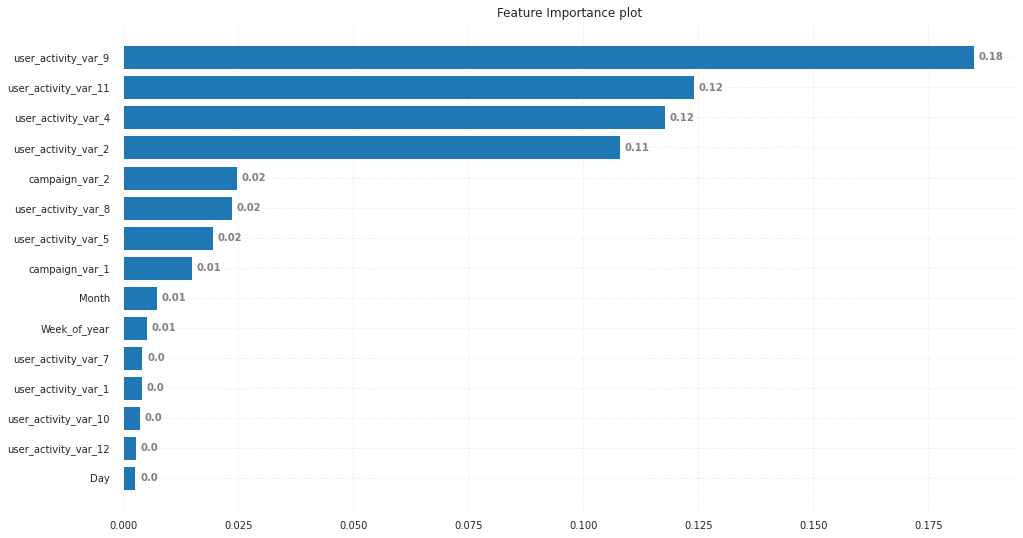

In [33]:
# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))
 
# Horizontal Bar Plot
ax.set_title("Feature Importance plot")
ax.barh(feature_imp.index, feature_imp.importance.values)

# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(visible = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()

# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.001, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')

### Making prediction

In [35]:
# making prediction on test data
test_pred = predictor.predict(test_data)

# creating submission file
submission_df = test_data.copy()
submission_df["buy"] = test_pred
submission_df = submission_df[["id", "buy"]]

# saving submission file
submission_df.to_csv("../output/output_nn_torch.csv", index = False)